# Subword Tokenization

In this exercise, we will learn how to train our own subword tokenizers with different algorithms: BPE and Unigram. We will use `sentencepiece`, a library from Google to help create our tokenizers.

## Ref:
https://github.com/google/sentencepiece/blob/master/python

## Setup

In [1]:
# !wget https://github.com/Knight-H/thai-lm/raw/refs/heads/master/data/pra-apai-manee-ch1-50.txt
# !wget https://github.com/Knight-H/thai-lm/raw/refs/heads/master/data/kratoo-40000000-40002000.jsonl

## Code

In [2]:
import sentencepiece as spm
import io
import json

Load data

In [3]:
pantip_text = []
with open('kratoo-40000000-40002000.jsonl', 'r') as json_file:
    json_list = list(json_file)
    for json_str in json_list:
        result = json.loads(json_str)
        pantip_text.append(f"{result['title']}\n{result['content']}\n")
sum([len(t) for t in pantip_text])

1060318

In [4]:
with open("pra-apai-manee-ch1-50.txt") as f:
  pra_apai_manee_data = f.readlines()

In [5]:
sum([len(t) for t in pra_apai_manee_data])

1100605

In [6]:
pantip_train_text = pantip_text[:int(len(pantip_text)*0.8)]
pantip_test_text = pantip_text[int(len(pantip_text)*0.8):]

pam_train_text = pra_apai_manee_data[:int(len(pra_apai_manee_data)*0.8)] #pam = pra_apai_manee
pam_test_text = pra_apai_manee_data[int(len(pra_apai_manee_data)*0.8):]

In [7]:
# convert list to txt file
def convert_list_to_txt(lst_data: list, filename: str):
    str_data = "".join(lst_data)
    with open(filename, "w") as f:
        f.write(str_data)

convert_list_to_txt(pantip_train_text, "pantip-train.txt")
convert_list_to_txt(pantip_test_text, "pantip-test.txt")
convert_list_to_txt(pam_train_text, "pam-train.txt")
convert_list_to_txt(pam_test_text, "pam-test.txt")

## Run tokenizer training

The Python wrapper provides multiple APIs for training our tokenizers

1. `spm.SentencePieceTrainer.train(input='input.txt', model_prefix='m', vocab_size=vocab_size, model_type=model_type)`
  <br> This will output the tokenizer files `m.model` and `m.vocab` that can be later loaded into `SentencePieceProcessor`.
  <br><br>
2. `spm.SentencePieceTrainer.train(sentence_iterator=iterator, model_writer=obj_with_write_method, vocab_size=vocab_size, model_type=model_type)`
  <br> This method will require a file object e.g. `obj_with_write_method = io.BytesIO()`. The advantage of this method is you can run sentencepiece on environments that have limited access to the local file system. But you will still have to save the model file if you want to re-use the model else you will have to train it again.
<br><br>
3.  `spm.SentencePieceTrainer.train('--input=input.txt --model_prefix=m --vocab_size=vocab_size --model_type=model_type')`
<br> Same as no.1




### Unigram tokenizer

We are going to start with training a unigram tokenizer. You can use any method of training one. Make sure to set vocab_size to 1000.

In [8]:
# TODO: Train
spm.SentencePieceTrainer.train(
    input='pam-train.txt',
    model_prefix='unigram-pam',
    vocab_size=1000,
    model_type='unigram'
)

sp_pam_unigram = spm.SentencePieceProcessor(model_file='unigram-pam.model')

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: pam-train.txt
  input_format: 
  model_prefix: unigram-pam
  model_type: UNIGRAM
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  d

### Q1 MCV

How many tokens did you get when tokenizing the following sentence with your unigram tokenizer: <br>
'อรุณสวัสดิ์ ฉันเอามเหสีมาหาม สวัสดี ประเทศไทยสบายดีไหม'

In [9]:
sp_pam = spm.SentencePieceProcessor(model_file='unigram-pam.model') # for later question
len(sp_pam_unigram.encode('อรุณสวัสดิ์ ฉันเอามเหสีมาหาม สวัสดี ประเทศไทยสบายดีไหม', out_type=str))

29

### BPE Tokenizer

Now try training a BPE tokenizer.

In [10]:
spm.SentencePieceTrainer.train(
    input='pam-train.txt',
    model_prefix='bpe-pam',
    vocab_size=1000,
    model_type='bpe'
)

sp_pam_bpe = spm.SentencePieceProcessor(model_file='bpe-pam.model')

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: pam-train.txt
  input_format: 
  model_prefix: bpe-pam
  model_type: BPE
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  different

### Q2 MCV

How many tokens did you get when tokenizing the following sentence with your BPE tokenizer: <br>
'อรุณสวัสดิ์ ฉันเอามเหสีมาหาม สวัสดี ประเทศไทยสบายดีไหม'

In [11]:
bpe = spm.SentencePieceProcessor(model_file='bpe-pam.model') # for later question
len(sp_pam_bpe.encode('อรุณสวัสดิ์ ฉันเอามเหสีมาหาม สวัสดี ประเทศไทยสบายดีไหม', out_type=str))

28

These are some of your vocabs. Note that you will see "▁" (U+2581) in every type of tokenizer in SentencePiece since it makes it possible to perform detokenization \(unsplit your sentences\) without relying on language-specific resources.

In [12]:
unigram_vocabs = [sp_pam.id_to_piece(id) for id in range(sp_pam.get_piece_size())]
" | ".join(unigram_vocabs[:500])

'<unk> | <s> | </s> | ▁ | า | เ | น | ม | ย | ก | ร | ว | ด | ส | ง | บ | ค | มา | อ | ล | จะ | ท | ให้ | ห | ไป | ไม่ | แ | ว่า | พ | ุ | ี | ๏ | ฯ | ข | ช | เป็น | พระ | โ | ที่ | ใจ | ▁จะ | จ | ะ | ิ | ต | ก็ | อยู่ | ป | ได้ | ่ | ไ | เข้า | ู | ▁พระ | ้า | ตาม | ใน | ้ | ▁แล้ว | เหมือน | รา | ศ | เจ้า | เห็น | ลา | กัน | ั | หา | นาง | ทรง | ประ | ์ | ยา | ัก | ํา | ซ | าน | ัง | ฉ | องค์ | ัด | แล้ว | อน | ดู | ถ | ด้วย | มี | ▁จึง | นี้ | ่า | ผ | น้อง | แต่ | ทํา | ▁นาง | ▁ให้ | รัก | พี่ | คิด | ลูก | พา | รู้ | การ | กับ | ัน | หน้า | กระ | วน | ออก | ่อ | เขา | ถึง | ระ | ข้า | ับ | พล | นั่ง | ทั้ง | หน | รับ | ษ | กล | วง | ลง | ฝ | กร | พร | ความ | เสีย | ดี | ขึ้น | อง | ่ง | ธ | ▁แต่ | คน | กลับ | ▁ฝ่าย | ้น | อด | ภ | หรือ | ตร | ือ | ฟัง | แม่ | ▁ไม่ | ไว้ | ยัง | ▁เห็น | นา | ขอ | มิ | น้ํา | หล | ดัง | ▁พอ | ▁ทั้ง | ช่วย | สม | นั้น | ริ | ทัพ | ต้อง | วัน | อา | น้อย | รบ | ิน | อย่า | เอา | จน | เรา | สุด | เสียง | ข้าง | หลัง | ตี | ตัว | ละ | สุ | วัง | ทุก | ่น

In [13]:
bpe_vocabs = [bpe.id_to_piece(id) for id in range(bpe.get_piece_size())]
" | ".join(bpe_vocabs[:500])

'<unk> | <s> | </s> | ้า | ่า | อง | ระ | ํา | รา | อย | ่ง | มา | จะ | ัง | ัน | ▁เ | าย | ้ว | ับ | ี่ | ม่ | อน | ให | าม | ้น | ็น | พระ | ีย | าง | กล | ้ง | ัก | หน | ให้ | ไม่ | หล | ่น | ึง | ▁แ | ทั | ตร | าร | ้อง | ไป | ิด | ข้า | ว่า | หม | คร | ือ | ล้ว | เป | เส | ประ | าน | ั่ง | ▁๏ | ▁ฯ | ที่ | อก | เล | ิน | ได | พล | ทร | ัด | นาง | ึก | ได้ | ู่ | ▁จะ | ค์ | ี้ | พร | เป็น | สุ | ทั้ง | อม | ัย | เร | ห็น | ▁จ | ▁พระ | ก็ | ใจ | อา | ื่ | ่าง | ต่ | กร | ิง | วง | วน | ือน | เจ | ู้ | ียง | อยู่ | รร | ตาม | ▁พ | ้วย | าว | ถึง | คล | ั้น | รี | เข | ด้วย | สม | องค์ | สน | าก | ▁แล้ว | เช | ัว | ย์ | ใน | คว | น้ | หมือน | ▁ส | ูก | อบ | กระ | เจ้า | ทรง | ลา | กัน | มี | ่าย | พรา | ิ่ง | เข้า | เห็น | ิต | สง | อด | ณ์ | วย | ้ม | คิด | เม | เก | เด | ▁นาง | วา | ุก | ▁ให้ | ดู | หา | ▁อ | ▁จึง | ทํา | ลง | รัก | เค | แล้ว | ่าน | พี่ | เหมือน | ั่น | ความ | ยง | อย่า | หร | มิ | ืน | ช่ | การ | ัญ | ▁ไม่ | ฝ่าย | ศรี | ้าง | วก | ้อม | ือง | น้อง | ยว | พา | แก |

### User-defined symbols

Another important concept to know of is User-defined symbols. These special symbols are reserved for a special purpose \(e.g.\, the \<MASK\> token used in BERT) and will always be tokenized into one token.

Refer to the documentation for ways to add these special tokens to your tokenizer.

https://github.com/google/sentencepiece/blob/master/python

## Train another tokenizer on another domain

Now try training another unigram tokenizer on `pantip_text` and we will use it to compare with the unigram tokenizer we trained earlier.

In [14]:
#TODO: Train

spm.SentencePieceTrainer.train(
    input="pantip-train.txt",
    model_prefix="unigram-pantip",
    vocab_size=1000,
    model_type="unigram",
)

# pam trained: sp_pam_unigram
sp_pantip_unigram = spm.SentencePieceProcessor(model_file="unigram-pantip.model")

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: pantip-train.txt
  input_format: 
  model_prefix: unigram-pantip
  model_type: UNIGRAM
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy:

## Analyse top tokens on different datasets

Use your tokenizers to tokenize the datasets and analyse your most common vocabularies (try 300-400 vocabs with len>1). Hint: tokenize your data and count the tokens.

In [15]:
import pandas as pd
from collections import Counter

def get_token_counts(tokenizer, dataset):
    token_counts = Counter()
    for line in dataset:
        tokens = tokenizer.encode(line, out_type=str)
        token_counts.update(tokens)
    return token_counts

# Tokenizers
sp_pam_unigram = spm.SentencePieceProcessor(model_file='unigram-pam.model')
sp_pantip_unigram = spm.SentencePieceProcessor(model_file='unigram-pantip.model')

# Count tokens for each dataset and tokenizer
pam_test_tokens_by_pam_model = get_token_counts(sp_pam_unigram, pam_test_text)
pam_test_tokens_by_pantip_model = get_token_counts(sp_pantip_unigram, pam_test_text)
pantip_test_tokens_by_pam_model = get_token_counts(sp_pam_unigram, pantip_test_text)
pantip_test_tokens_by_pantip_model = get_token_counts(sp_pantip_unigram, pantip_test_text)

def filter_top_tokens(token_counts, top_n=400):
    # Filter tokens by length > 1 and keep the top 300-400
    return {token: count for token, count in token_counts.most_common(top_n) if len(token) > 1}

pam_test_top_tokens_by_pam_model = filter_top_tokens(pam_test_tokens_by_pam_model)
pam_test_top_tokens_by_pantip_model = filter_top_tokens(pam_test_tokens_by_pantip_model)
pantip_test_top_tokens_by_pam_model = filter_top_tokens(pantip_test_tokens_by_pam_model)
pantip_test_top_tokens_by_pantip_model = filter_top_tokens(pantip_test_tokens_by_pantip_model)

all_tokens = set(
    list(pam_test_top_tokens_by_pam_model.keys()) +
    list(pam_test_top_tokens_by_pantip_model.keys()) +
    list(pantip_test_top_tokens_by_pam_model.keys()) +
    list(pantip_test_top_tokens_by_pantip_model.keys())
)

df_report = pd.DataFrame({
    "Token": list(all_tokens),
    "pam_test_pam_model": [pam_test_top_tokens_by_pam_model.get(token, 0) for token in all_tokens],
    "pam_test_pantip_model": [pam_test_top_tokens_by_pantip_model.get(token, 0) for token in all_tokens],
    "pantip_test_pam_model": [pantip_test_top_tokens_by_pam_model.get(token, 0) for token in all_tokens],
    "pantip_test_pantip_model": [pantip_test_top_tokens_by_pantip_model.get(token, 0) for token in all_tokens],
})

df_report.sort_values("pam_test_pam_model", ascending=False, inplace=True)

In [16]:
df_report.head(10)

,Token,pam_test_pam_model,pam_test_pantip_model,pantip_test_pam_model,pantip_test_pantip_model
542,มา,666,823,988,656
575,ไป,657,656,667,659
360,ให้,650,915,483,405
445,จะ,622,1107,642,633
348,ไม่,536,700,684,536
301,ว่า,520,532,812,568
271,พระ,462,866,0,70
579,▁จะ,421,0,67,0
489,ที่,417,414,1247,1137
342,เป็น,387,490,476,522


In [17]:
df_report.tail(10)

,Token,pam_test_pam_model,pam_test_pantip_model,pantip_test_pam_model,pantip_test_pantip_model
149,แอบ,0,22,0,0
396,เช่น,0,41,39,0
395,ไม่ได้,0,0,0,166
152,ควร,0,35,78,78
393,เปิด,0,0,0,53
153,คํา,0,85,86,68
391,ตลอด,0,0,0,54
389,ฝาก,0,0,25,0
155,ชีวิต,0,36,31,0
0,ร้าย,0,36,0,0


### To answer
What are some notable differences you see between the two vocabs?

Write your answer below.

*Answer*:

- 'พระ': เจอบ่อยใน dataset pam แต่เจอน้อยใน dataset pantip
- '▁จะ' vs 'จะ': เจอเฉพาะใน pam_model ซึ่งอาจจะมาจาก pam_train_text แต่ไม่เจอเลยใน pantip_model เพราะอาจจะไม่มีอยู่ใน pantip_train_text หรือไม่ก็เพระา pantip_model สามารถแยกคำว่า 'จะ' ออกมาจาก '_' ได้
- 'ยังไง': เจอเฉพาะใน pantip_test_pantip_model เพราะอาจจะเป็นภาษาพูดที่ใช้แต่ใน pantip ไม่เจอในกวี เลยทำให้ model ที่ตรวจจับได้มีเฉพาะ pantip_test_pantip_model

## Using tokenizer across domains

One problem you may face is your dataset is very specialized. In that case the tokenizer trained on a general domain may not perform as good as it should when used on your dataset.

Next you will try using tokenizers trained on one general domain (on Pantip) and use it on a specialized domain (พระอภัยมณี) and vice versa.

### Q3 MCV

What percentage increase do you observe when tokenizing the whole พระอภัยมณี dataset with a tokenizer trained on Pantip compared to the one trained on พระอภัยมณี.

In [18]:
# Training
# pam model on pam data
model_writer_ = io.BytesIO()
spm.SentencePieceTrainer.train(sentence_iterator=iter(pam_train_text), model_writer=model_writer_, vocab_size = 1000)
sp_pam = spm.SentencePieceProcessor(model_proto=model_writer_.getvalue())

# pantip model on pantip data
model_writer_ = io.BytesIO()
spm.SentencePieceTrainer.train(sentence_iterator=iter(pantip_train_text), model_writer=model_writer_, vocab_size = 1000)
sp_pantip = spm.SentencePieceProcessor(model_proto=model_writer_.getvalue())

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input_format: 
  model_prefix: 
  model_type: UNIGRAM
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noise_level: 0

In [19]:
# dataset: pra_apai_manee_data
pra_apai_manee_data_str = ''.join(pra_apai_manee_data)
print(
    (
        len(sp_pantip.encode(pra_apai_manee_data_str))
        / len(sp_pam.encode(pra_apai_manee_data_str))
        - 1
    )
    * 100
)

43.42710745209495


### Q4 MCV

What percentage increase do you observe when tokenizing the whole Pantip dataset with a tokenizer trained on พระอภัยมณี compared to the one trained on Pantip.

In [20]:
# dataset: pantip_text
pantip_text_str = ''.join(pantip_text)
result = (sum(map(len, sp_pam.encode(pantip_text))) / sum(map(len, (sp_pantip.encode(pantip_text))))- 1) * 100
print(result)
print(f"round= {round(result)} %")

12.855248847916112
round= 13 %


### To answer
Why do you think the number of tokens tokenized by the general tokenizer (the one trained on Pantip) has a higher percentage increase compared to the number of tokens tokenized by the specialized tokenizer? (Hint: we fixed vocab size.)

In [24]:
pam_vocabs = [sp_pam.id_to_piece(id) for id in range(sp_pam.get_piece_size())]
pantip_vocabs = [sp_pantip.id_to_piece(id) for id in range(sp_pantip.get_piece_size())]

def count_words_by_length(vocabulary):
    length_counts = {}
    for word in vocabulary:
        word_length = len(word)
        length_counts[word_length] = length_counts.get(word_length, 0) + 1
    return length_counts

pam_length_counts = count_words_by_length(pam_vocabs)
pantip_length_counts = count_words_by_length(pantip_vocabs)

In [27]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    # Axes
    'axes.titlesize': 16,
    'axes.titlepad': 20,
    'axes.labelsize': 12,
    'axes.edgecolor': (0.1, 0.1, 0.1),
    'axes.labelcolor': (0.1, 0.1, 0.1),
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.grid': True,

    # Grid
    'grid.alpha': 0.7,
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,

    # Lines
    'lines.linewidth': 1.5,
    'lines.markeredgewidth': 0.0,

    # Scatter plot
    'scatter.marker': 'x',

    # Ticks
    'xtick.labelsize': 12,
    'xtick.color': (0.1, 0.1, 0.1),
    'xtick.direction': 'in',
    'ytick.labelsize': 12,
    'ytick.color': (0.1, 0.1, 0.1),
    'ytick.direction': 'in',

    # Figure output
    'figure.figsize': (10, 6),
    'figure.dpi': 200,
    'savefig.dpi': 200,

    # Text
    'text.color': (0.2, 0.2, 0.2),

    # Font
    "font.family": ["serif",
                    "Tahoma"] # TH Font
})

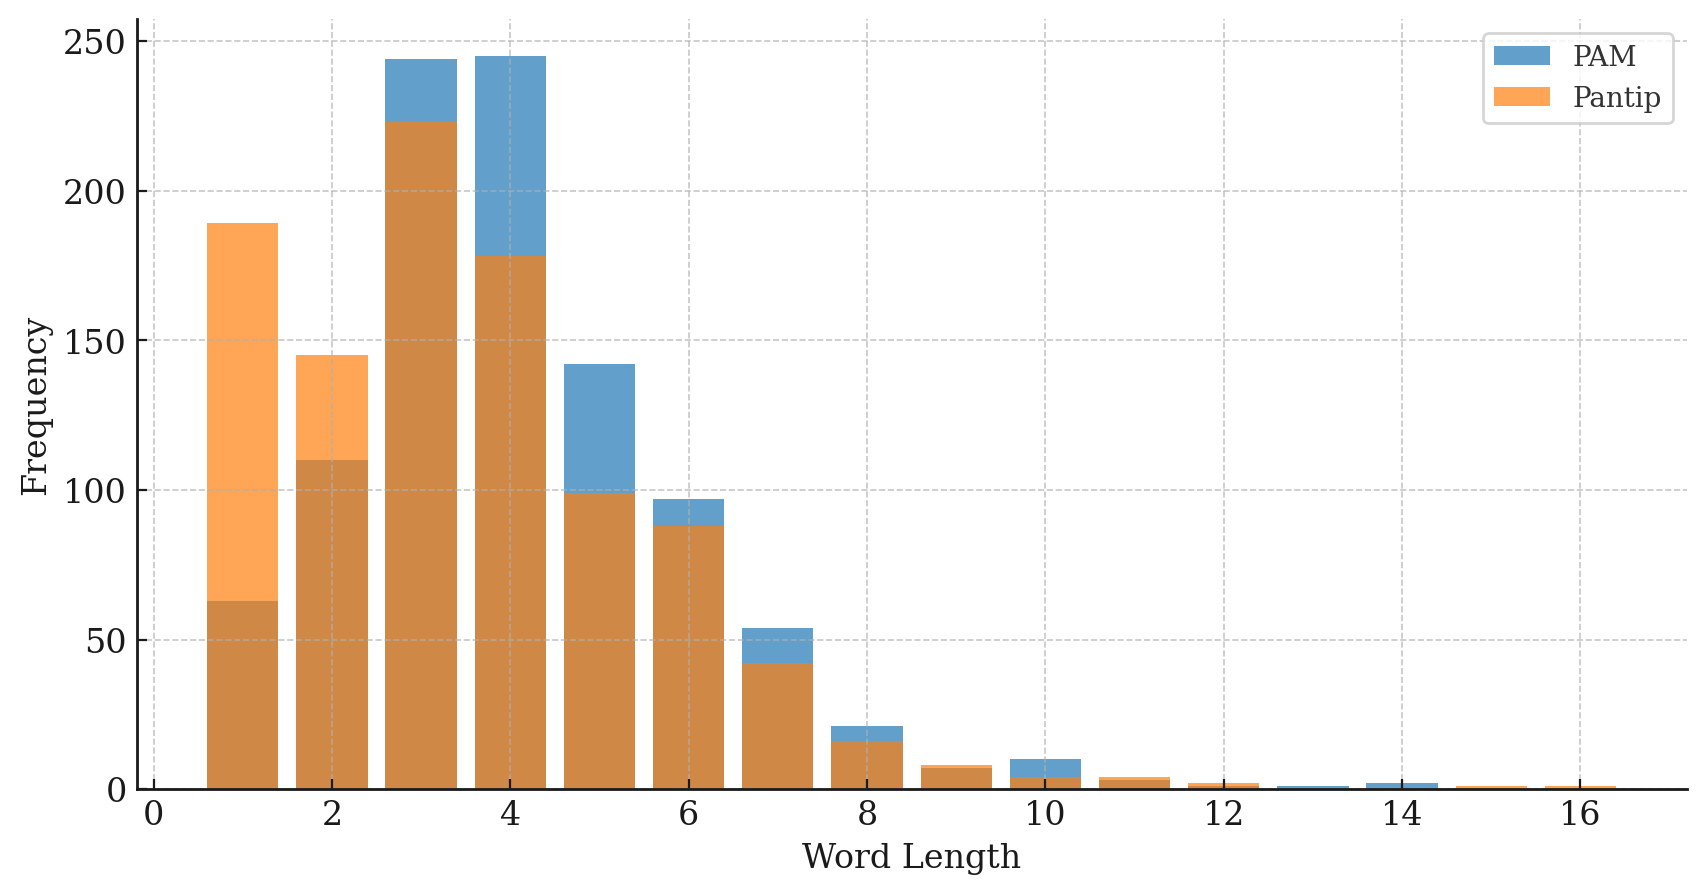

In [34]:
# plot the distribution of word lengths
plt.figure(figsize=(10, 5))
plt.bar(pam_length_counts.keys(), pam_length_counts.values(), alpha=0.7, label='PAM')
plt.bar(pantip_length_counts.keys(), pantip_length_counts.values(), alpha=0.7, label='Pantip')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*Answer*: 

เมื่อเรา fix vocab size, 
general tokenizer (the one trained on Pantip) ซึ่งข้อมูลที่เทรนมีความหลากหลายและกว้างกว่า ทำให้จำเป็นต้องเก็บ vocab เป็น ตัวอักษรเดี่ยวๆ(char) หรือ 2 char ซึ่งจะเห็นได้จากกราฟด้านบน ที่ word length= 1, 2 ของ Pantip มากกว่า PAM อยู่มาก
ส่วน specialized tokenizer (the one trained on PAM) ซึ่งข้อมูลที่เทรนมีความหลากหลายน้อยกว่า จะเก็บ vocab ที่เป็นคำที่ยาวกว่า 1-2 char ได้ ซึ่งเป็นคำยาวที่มีความหมาย ซึ่งจะเห็นได้จากกราฟด้านบน ที่ word length ตั้งแต่ 3 ขึ้นไป ของ PAM มากกว่า Pantip

## The effect on language models

Next, we will see the effect of using "cross-domain" tokenizers on Language models.

### Setup
We are going to reuse the code from the last assignment

In [ ]:
# !pip install lightning

In [35]:
import itertools
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import lightning as L
from tqdm import tqdm
import numpy as np

In [36]:
class TextDataset(Dataset):
  def __init__(self, data, tokenizer, seq_len = 128):

    token_ids = [tokenizer.encode(d, add_bos=True, add_eos=True) for d in data]
    flatten_token_ids = list(itertools.chain(*token_ids))
    encoded = torch.LongTensor(flatten_token_ids)

    left_over = len(encoded) % seq_len
    encoded = encoded[:len(encoded)-left_over]
    self.encoded = encoded.view(-1, seq_len)

  def __getitem__(self, idx):
    return self.encoded[idx]

  def __len__(self):
    return len(self.encoded)

In [37]:
class LSTM(L.LightningModule):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, learning_rate, criterion):

        super().__init__()

        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding_dim = embedding_dim
        self.vocab_size=vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers,
                    dropout=dropout_rate, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.learning_rate = learning_rate
        self.criterion = criterion

    def forward(self, src):
        # TODO: Implement the forward pass
        embedded = self.embedding(src)
        embedded = self.dropout(embedded)

        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)

        output = self.fc(lstm_out)
        return output

    def training_step(self, batch, batch_idx):

        src = batch[:, :-1]
        target = batch[:, 1:]
        prediction = self(src)
        prediction = prediction.reshape(-1, self.vocab_size)
        target = target.reshape(-1)
        loss = self.criterion(prediction, target)
        self.log("train_loss", loss)
        return loss

    def test_step(self, batch, batch_idx, dataloader_idx=0):

        src = batch[:, :-1]
        target = batch[:, 1:]
        with torch.no_grad():
          prediction = self(src)
        prediction = prediction.reshape(-1, self.vocab_size)
        target = target.reshape(-1)
        loss = self.criterion(prediction, target)
        self.log("test_loss", loss)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

In [38]:
vocab_size = sp_pam.get_piece_size()
embedding_dim = 200
hidden_dim = 512
num_layers = 3
dropout_rate = 0.2
lr = 1e-3
criterion = nn.CrossEntropyLoss()
train_batch_size = 64
test_batch_size = 128

### Training

<a name="no1"></a>
#### 1. Training on Pantip data with Pantip tokenizer

In [39]:
trainer = L.Trainer(
    max_epochs=10,
    deterministic=True
)
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, lr, criterion)

pantip_train_dataset = TextDataset(pantip_train_text, sp_pantip)
pantip_train_loader = DataLoader(pantip_train_dataset, batch_size = train_batch_size, shuffle = True)

pantip_test_dataset = TextDataset(pantip_test_text, sp_pantip)
pantip_test_loader = DataLoader(pantip_test_dataset, batch_size = test_batch_size, shuffle = False)

pam_train_dataset = TextDataset(pam_train_text, sp_pantip)
pam_train_loader = DataLoader(pam_train_dataset, batch_size = train_batch_size, shuffle = True)

pam_test_dataset = TextDataset(pam_test_text, sp_pantip)
pam_test_loader = DataLoader(pam_test_dataset, batch_size = test_batch_size, shuffle = False)

trainer.fit(model, train_dataloaders=pantip_train_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | embedding | Embedding        | 200 K  | train
1 | lstm      | LSTM             | 5.7 M  | train
2 | dropout   | Dropout          | 0      | train
3 | fc        | Linear           | 513 K  | train
4 | criterion

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [40]:
test_result = trainer.test(model, dataloaders=[pantip_train_loader, pam_train_loader, pantip_test_loader,pam_test_loader], verbose=False)

print(f"Perplexity on Pantip train set is:\t{np.exp(test_result[0]['test_loss/dataloader_idx_0'])}")
print(f"Perplexity on Pra apai manee train set is:\t{np.exp(test_result[1]['test_loss/dataloader_idx_1'])}")
print(f"Perplexity on Pantip test set is:\t{np.exp(test_result[2]['test_loss/dataloader_idx_2'])}")
print(f"Perplexity on Pra apai manee test set is:\t{np.exp(test_result[3]['test_loss/dataloader_idx_3'])}")

/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:476: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

Perplexity on Pantip train set is:	37.777939127211795
Perplexity on Pra apai manee train set is:	103.03663751992065
Perplexity on Pantip test set is:	150.33362038940408
Perplexity on Pra apai manee test set is:	163.3114732086469


<a name="no2"></a>
#### 2. Training on Pantip data with Pra apai manee tokenizer

In [41]:
trainer = L.Trainer(
    max_epochs=10,
    deterministic=True
)
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, lr, criterion)

pantip_train_dataset = TextDataset(pantip_train_text, sp_pam)
pantip_train_loader = DataLoader(pantip_train_dataset, batch_size = train_batch_size, shuffle = True)

pantip_test_dataset = TextDataset(pantip_test_text, sp_pam)
pantip_test_loader = DataLoader(pantip_test_dataset, batch_size = test_batch_size, shuffle = False)

pam_train_dataset = TextDataset(pam_train_text, sp_pam)
pam_train_loader = DataLoader(pam_train_dataset, batch_size = train_batch_size, shuffle = True)

pam_test_dataset = TextDataset(pam_test_text, sp_pam)
pam_test_loader = DataLoader(pam_test_dataset, batch_size = test_batch_size, shuffle = False)

trainer.fit(model, train_dataloaders=pantip_train_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | embedding | Embedding        | 200 K  | train
1 | lstm      | LSTM             | 5.7 M  | train
2 | dropout   | Dropout          | 0      | train
3 | fc        | Linear           | 513 K  | train
4 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
6.4 M     Trainable params
0         Non-trainable params
6.4 M     Total params
25.511    Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [42]:
test_result = trainer.test(model, dataloaders=[pantip_train_loader, pam_train_loader, pantip_test_loader,pam_test_loader], verbose=False)

print(f"Perplexity on Pantip train set is:\t{np.exp(test_result[0]['test_loss/dataloader_idx_0'])}")
print(f"Perplexity on Pra apai manee train set is:\t{np.exp(test_result[1]['test_loss/dataloader_idx_1'])}")
print(f"Perplexity on Pantip test set is:\t{np.exp(test_result[2]['test_loss/dataloader_idx_2'])}")
print(f"Perplexity on Pra apai manee test set is:\t{np.exp(test_result[3]['test_loss/dataloader_idx_3'])}")

Testing: |          | 0/? [00:00<?, ?it/s]

Perplexity on Pantip train set is:	18.187480466363347
Perplexity on Pra apai manee train set is:	472.05631660275105
Perplexity on Pantip test set is:	52.83999932868568
Perplexity on Pra apai manee test set is:	375.453429687528


#### To answer

The perplexity numbers should indicate that:
1. Training the LM with Pra apai manee tokenizer on Pantip (no. [2](#no2)) results in overfitting to Pantip and poor generalization to the Pra apai manee dataset.
2. However using the Pantip tokenizer (no. [1](#no1)) results in a much better generalization.

Try and come up with some reasons for the results above. <br>
Hint:
1. think about "general" vocabs and domain-specific vocabs.
2. what do you think happens to the model when the token ids become longer.


<a name="no3"></a>
#### 3. Training on Pra apai manee data with Pantip tokenizer


In [43]:
trainer = L.Trainer(
    max_epochs=10,
    deterministic=True
)
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, lr, criterion)

pantip_train_dataset = TextDataset(pantip_train_text, sp_pantip)
pantip_train_loader = DataLoader(pantip_train_dataset, batch_size = train_batch_size, shuffle = True)

pantip_test_dataset = TextDataset(pantip_test_text, sp_pantip)
pantip_test_loader = DataLoader(pantip_test_dataset, batch_size = test_batch_size, shuffle = False)

pam_train_dataset = TextDataset(pam_train_text, sp_pantip)
pam_train_loader = DataLoader(pam_train_dataset, batch_size = train_batch_size, shuffle = True)

pam_test_dataset = TextDataset(pam_test_text, sp_pantip)
pam_test_loader = DataLoader(pam_test_dataset, batch_size = test_batch_size, shuffle = False)

trainer.fit(model, train_dataloaders=pam_train_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | embedding | Embedding        | 200 K  | train
1 | lstm      | LSTM             | 5.7 M  | train
2 | dropout   | Dropout          | 0      | train
3 | fc        | Linear           | 513 K  | train
4 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
6.4 M     Trainable params
0         Non-trainable params
6.4 M     Total params
25.511    Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [44]:
test_result = trainer.test(model, dataloaders=[pantip_train_loader, pam_train_loader, pantip_test_loader,pam_test_loader], verbose=False)

print(f"Perplexity on Pantip train set is:\t{np.exp(test_result[0]['test_loss/dataloader_idx_0'])}")
print(f"Perplexity on Pra apai manee train set is:\t{np.exp(test_result[1]['test_loss/dataloader_idx_1'])}")
print(f"Perplexity on Pantip test set is:\t{np.exp(test_result[2]['test_loss/dataloader_idx_2'])}")
print(f"Perplexity on Pra apai manee test set is:\t{np.exp(test_result[3]['test_loss/dataloader_idx_3'])}")

Testing: |          | 0/? [00:00<?, ?it/s]

Perplexity on Pantip train set is:	2568.4258218565624
Perplexity on Pra apai manee train set is:	30.710252241542985
Perplexity on Pantip test set is:	1496.8456380270095
Perplexity on Pra apai manee test set is:	44.494923709385425


<a name="no4"></a>
#### 4. Training on Pra apai manee data with Pra apai manee tokenizer




In [45]:
trainer = L.Trainer(
    max_epochs=10,
    deterministic=True
)
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, lr, criterion)

pantip_train_dataset = TextDataset(pantip_train_text, sp_pam)
pantip_train_loader = DataLoader(pantip_train_dataset, batch_size = train_batch_size, shuffle = True)

pantip_test_dataset = TextDataset(pantip_test_text, sp_pam)
pantip_test_loader = DataLoader(pantip_test_dataset, batch_size = test_batch_size, shuffle = False)

pam_train_dataset = TextDataset(pam_train_text, sp_pam)
pam_train_loader = DataLoader(pam_train_dataset, batch_size = train_batch_size, shuffle = True)

pam_test_dataset = TextDataset(pam_test_text, sp_pam)
pam_test_loader = DataLoader(pam_test_dataset, batch_size = test_batch_size, shuffle = False)

trainer.fit(model, train_dataloaders=pam_train_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | embedding | Embedding        | 200 K  | train
1 | lstm      | LSTM             | 5.7 M  | train
2 | dropout   | Dropout          | 0      | train
3 | fc        | Linear           | 513 K  | train
4 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
6.4 M     Trainable params
0         Non-trainable params
6.4 M     Total params
25.511    Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want t

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [46]:
test_result = trainer.test(model, dataloaders=[pantip_train_loader, pam_train_loader, pantip_test_loader,pam_test_loader], verbose=False)

print(f"Perplexity on Pantip train set is:\t{np.exp(test_result[0]['test_loss/dataloader_idx_0'])}")
print(f"Perplexity on Pra apai manee train set is:\t{np.exp(test_result[1]['test_loss/dataloader_idx_1'])}")
print(f"Perplexity on Pantip test set is:\t{np.exp(test_result[2]['test_loss/dataloader_idx_2'])}")
print(f"Perplexity on Pra apai manee test set is:\t{np.exp(test_result[3]['test_loss/dataloader_idx_3'])}")

Testing: |          | 0/? [00:00<?, ?it/s]

Perplexity on Pantip train set is:	334.40860869113
Perplexity on Pra apai manee train set is:	94.9720076122235
Perplexity on Pantip test set is:	278.42280897167
Perplexity on Pra apai manee test set is:	113.56567953163085


#### To answer

The perplexity numbers should indicate that:
1. Both LM overfits on Pra apai manee data and performs really bad on Pantip data.
2. However using the Pra apai manee tokenizer (no. [4](#no4)) results in a  better generalization than the Pantip tokenizer(no. [3](#no3)).

Try and come up with some reasons for the results above. <br>